In [1]:
import calour as ca
%matplotlib notebook

In [2]:
ca.set_log_level(11)

# Load the ants dataset
Data from:

"Dramatic Differences in Gut Bacterial Densities Correlate with Diet and Habitat in Rainforest Ants"

Jon G. Sanders,1,*,† Piotr Łukasik,‡ Megan E. Frederickson,§ Jacob A. Russell,‡ Ryuichi Koga,¶
Rob Knight† and Naomi E. Pierce*

In [4]:
dat=ca.read_amplicon('./all.withtax.biom','./map.txt',normalize=10000,min_reads=1000)

2017-10-16 22:11:22 INFO loaded 389 samples, 41409 features
2017-10-16 22:11:22 WARNING These have metadata but do not have data - dropped: {'10343.BLANK.JS6.12G', '10343.JS2079.c1', '10343.JS2199', '10343.JS2068.b', '10343.JS1497', '10343.JS2009.e', '10343.JS2113', '10343.JS1530', '10343.JS1170', '10343.JS2101', '10343.JS1946', '10343.JS1543', '10343.JS1378', '10343.JS1709', '10343.JS1969', '10343.JS1684', '10343.JS1399', '10343.JS1901', '10343.JS1125', '10343.JS1000', '10343.JS1041', '10343.JS1749', '10343.JS1784', '10343.JS1564.a', '10343.JS1708', '10343.JS1180.d', '10343.JS1154', '10343.JS1288', '10343.JS1648', '10343.JS1553', '10343.JS1797', '10343.JS1625', '10343.JS1213', '10343.JS1225.b', '10343.JS1470', '10343.JS1139', '10343.JS1251', '10343.JS1027', '10343.JS1900', '10343.JS1215', '10343.JS1746.d', '10343.JS1507', '10343.JS1165.d', '10343.JS1138', '10343.JS1532', '10343.JS2004', '10343.JS0981', '10343.JS1344', '10343.JS1297.d', '10343.BLANK.JS6.12H', '10343.JS1354.d', '10343.J

## Filter and sort samples and features
Keeping only main ant genus samples (ones that have at least 14 adult samples per genus), and only interesting features (enough reads)

In [6]:
datc = dat.filter_samples('genus',['Camponotus','Dolichoderus','Cephalotes','Neoponera','Azteca'])
datc = datc.filter_abundance(100)
datc=datc.sort_samples('life_stage').sort_samples('primer_plate').sort_samples('colony').sort_samples('genus')

2017-10-16 22:11:32 INFO After filtering, 455 remaining


In [7]:
datc = datc.cluster_features()

2017-10-16 22:11:34 INFO After filtering, 455 remaining


## Plot the whole experiment heatmap (fig 4A)

<IPython.core.display.Javascript object>


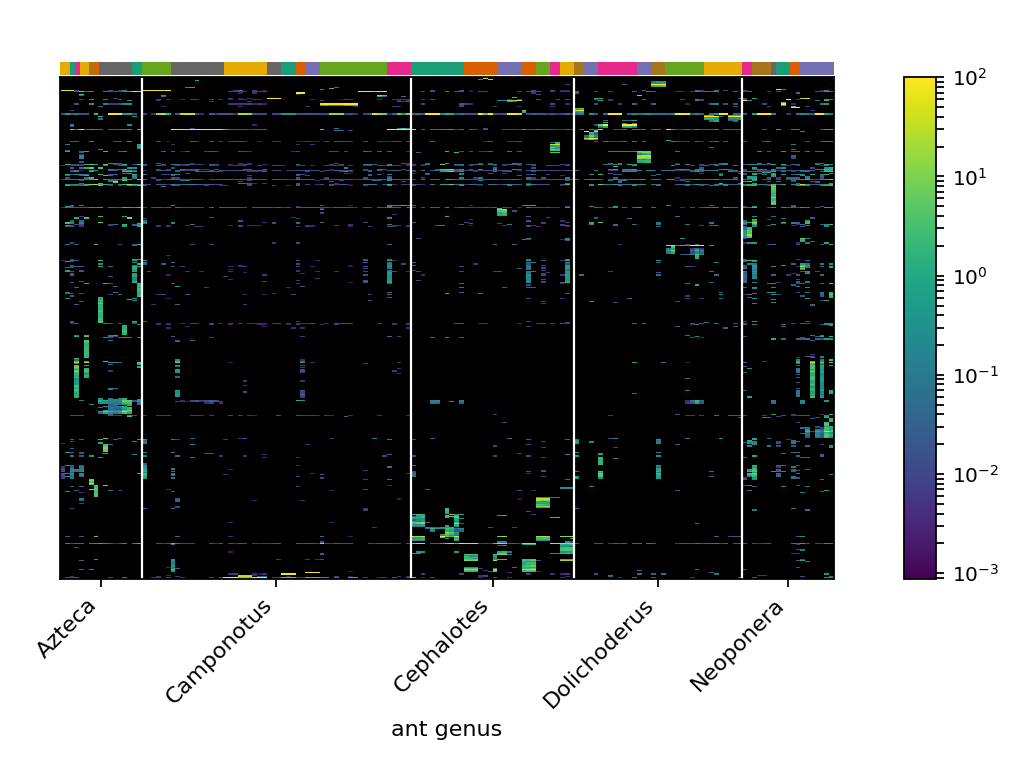

In [10]:
f=datc.normalize(100).plot(sample_field='genus',gui='jupyter',
                           barx_fields=['colony'],barx_label=False,
                           feature_field=None,clim=[0,100])
f.ax_hm.axes.set_xlabel('ant genus')

In [11]:
f.save_figure('figure-4A-ants-all.pdf')

# Plate dependent contaminant

For the plate contaminant, look at all samples (since we sort by plate)

In [13]:
alldatc = dat.filter_abundance(10)
alldatc=alldatc.sort_samples('life_stage').sort_samples('primer_plate').sort_samples('colony').sort_samples('genus')
alldatc=alldatc.cluster_features()

2017-10-16 22:12:58 INFO After filtering, 8292 remaining
2017-10-16 22:12:58 INFO After filtering, 8292 remaining


Interactively explore to find the candidate contamination bacteria
and print their axes ranges for the zoom plot

<IPython.core.display.Javascript object>


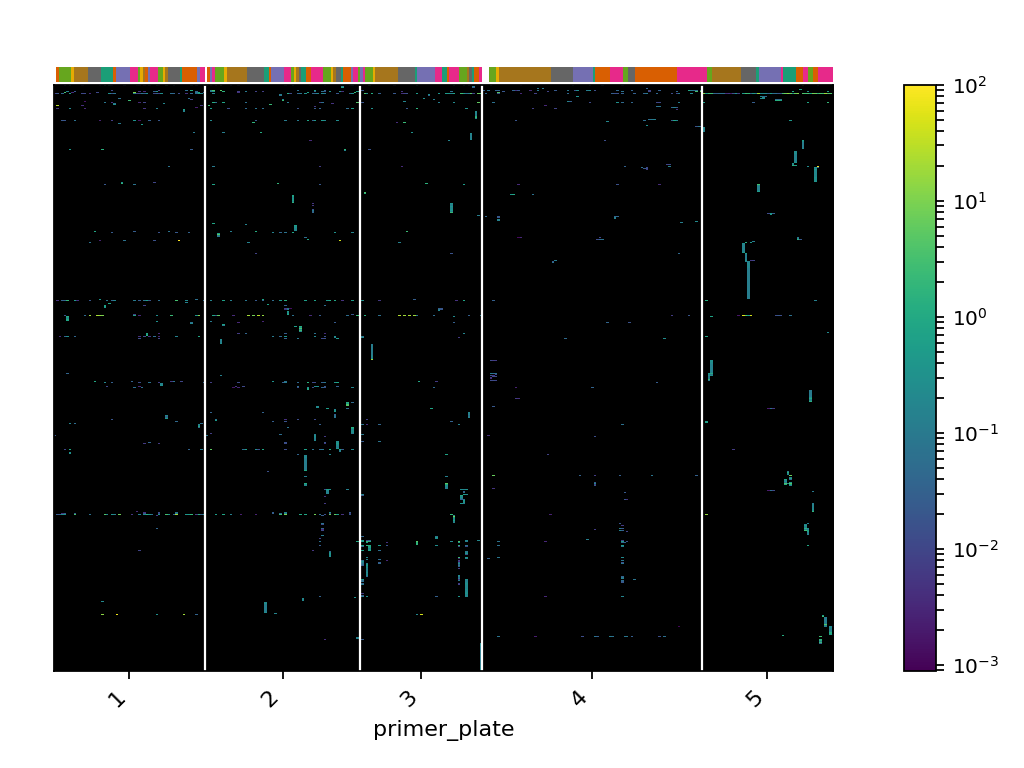

In [14]:
f=alldatc.normalize(100).sort_samples('primer_plate').plot(sample_field='primer_plate',gui='jupyter',
                                                           barx_fields=['genus'],barx_label=False,
                                                           feature_field=None,clim=[0,100])

## Save the plate dependent contaminant (Fig 4B)

After zooming in and exploring in the the previous plot, we plot only the specified the region showing the contaminant:

<IPython.core.display.Javascript object>


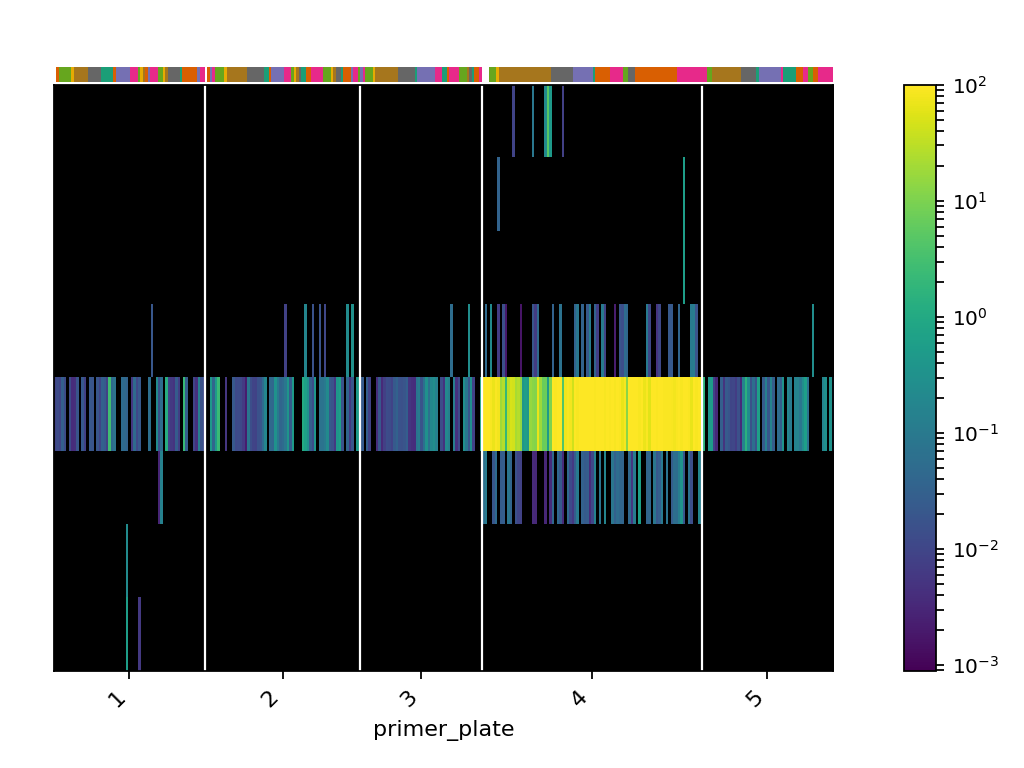

In [15]:
f=alldatc.normalize(100).sort_samples('primer_plate').plot(sample_field='primer_plate',gui='jupyter',
                                                           barx_fields=['genus'],barx_label=False,
                                                           feature_field=None,clim=[0,100],
                                                           rect=[-0.5, 314.5, 19.5, 11.5])

In [16]:
f.save_figure('figure-4B-ants-plate-contaminant.pdf')

In [ ]:
# Add common dbbact term (out of contaminant / other / none)

In [19]:
datc=datc.add_terms_to_features('dbbact',['contaminant'])

## look for general reagent contaminants

keep only the 5 main genuses for the plot to make it nicer

<IPython.core.display.Javascript object>


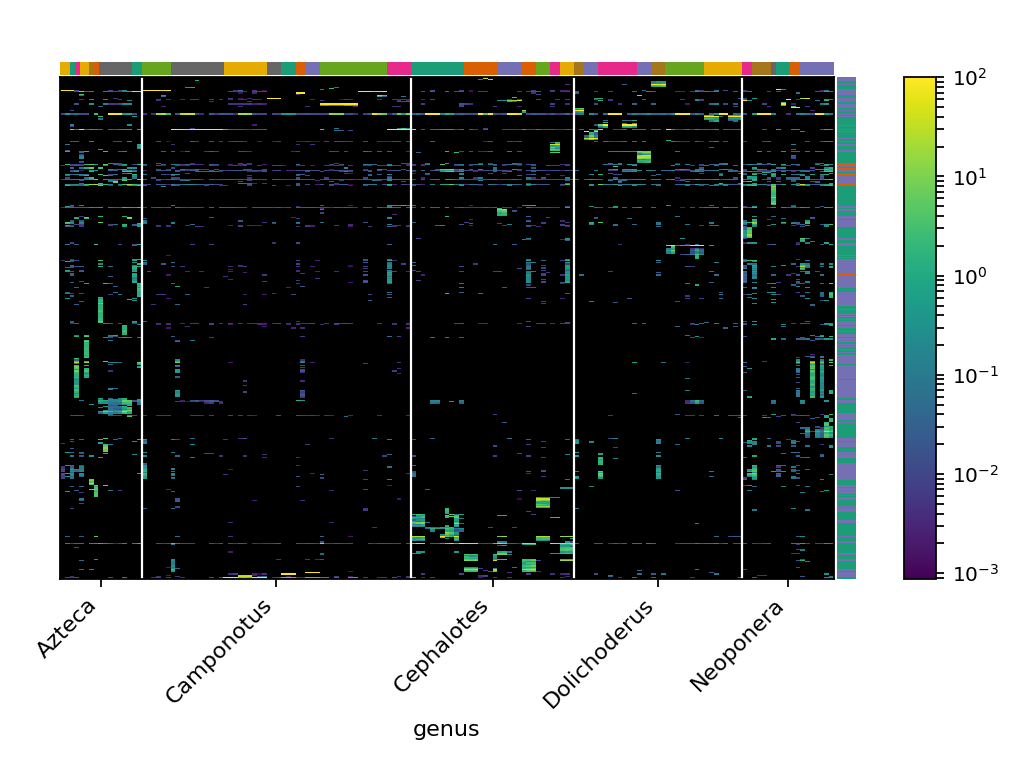

In [20]:
f=datc.normalize(100).plot(sample_field='genus',gui='jupyter',
                           barx_fields=['colony'],barx_label=False,
                           bary_fields=['common_term'],bary_label=False,
                           feature_field=None,clim=[0,100])

In [23]:
general_contam = alldatc.filter_samples('genus',['Camponotus','Dolichoderus','Cephalotes','Neoponera','Azteca'])
general_contam.add_terms_to_features('dbbact',['contaminant'])

AmpliconExperiment all.withtax.biom
-----------------------------------
data dimension: 161 samples, 8292 features
sample IDs: Index(['10343.JS0915', '10343.JS0916', '10343.JS1040', '10343.JS1727',
       '10343.JS1760', '10343.JS1764', '10343.JS1798', '10343.JS1912',
       '10343.JS2080', '10343.JS2081',
       ...
       '10343.JS1862', '10343.JS2126', '10343.JS2127', '10343.JS2153',
       '10343.JS2154', '10343.JS2155', '10343.JS2159.b', '10343.JS2159.a',
       '10343.JS2182.d', '10343.JS2182.e'],
      dtype='object', name='#SampleID', length=161)
feature IDs: Index(['CACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGAGTACGTAGGTGGTTTATTAAGTCAGATGTGAAATCCCTGAGCTTAACTTAGGAACTGCATTTGAAACTGATAAACTAGAGTTTCGTAGAGGGGGGTAGAATTCCAGG',
       'TACGTAGGTGGCAAGCGTTGTCCGGAATTATTGGGCGTAAAGCGCGCGCAGGCGGTTTCTTAAGTCTGATGTGAAAGCCCCCGGCTCAACCGGGGAGGGTCATTGGAAACTGGGGAACTTGAGTGCAGAAGAGGAGAGTGGAATTCCACG',
       'CCCCATTCTCGTTTTGTTTTTCCCTCCGGCGGTTTTTCGTGTTTCCCCCTAAAACGACTGTATTCTCGGACATATCCGCCACAATATCTGCCATCG

Interactively explore to find the contaminant block and save the cooredinates

In [24]:
f=general_contam.normalize(100).plot(sample_field='genus',gui='jupyter',
                                     barx_fields=['colony'], barx_label=False,
                                     bary_fields=['common_term'], bary_label=False,
                                     feature_field=None,clim=[0,100])

<IPython.core.display.Javascript object>

## Save general contaminant figure (Fig 4C)
feature colorbar : orange - contaminant, blue - other, green - unknown

<IPython.core.display.Javascript object>


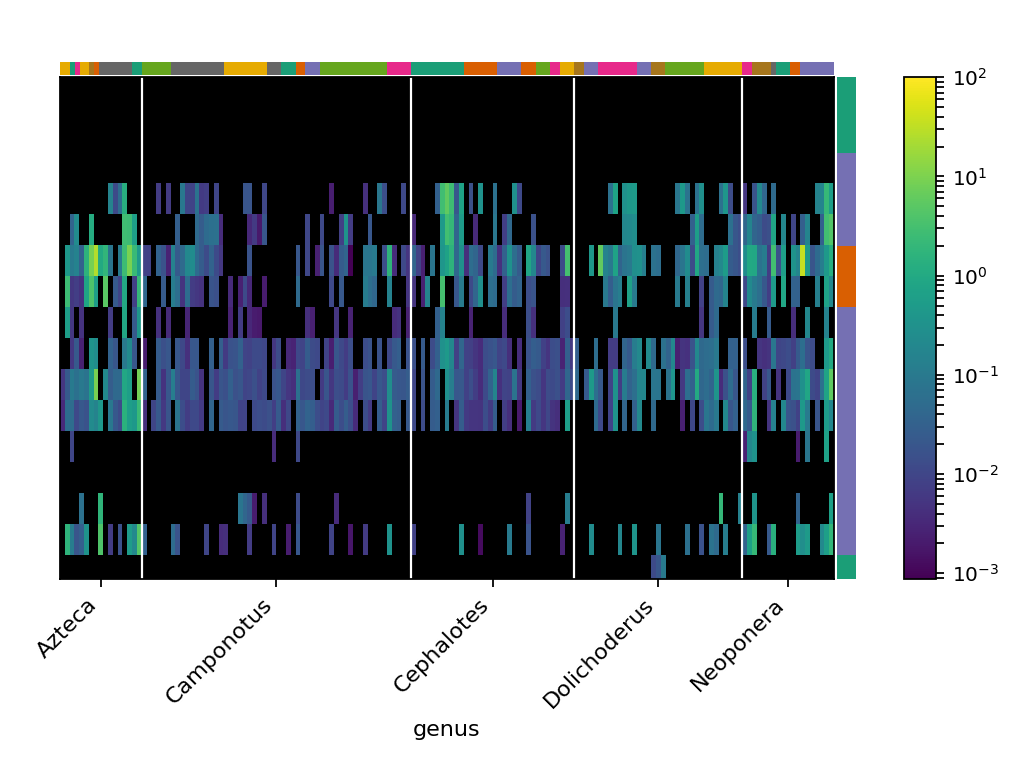

In [26]:
f=general_contam.normalize(100).plot(sample_field='genus',gui='jupyter',
                                     barx_fields=['colony'], barx_label=False,
                                     bary_fields=['common_term'], bary_label=False,
                                     feature_field=None,clim=[0,100],
                                     rect=[-0.5, 160.5, 145.2578125, 129.0625])

In [27]:
f.save_figure('figure-4C-ants-general-contaminant.eps', format='eps')

## saved the 3 plate dependent contaminants to "contamination.fa" using the gui

## saved the 8 general contaminants to contamination2.fa

# Filter for contaminants and keep only main genuses/life stage

## Only remove the per plate contaminants
save to ants-filtered-1.biom

In [28]:
datn=ca.read_amplicon('./all.withtax.biom', './map.txt', normalize=None, min_reads=None)

2017-10-16 23:04:54 INFO loaded 389 samples, 41409 features
2017-10-16 23:04:54 WARNING These have metadata but do not have data - dropped: {'10343.BLANK.JS6.12G', '10343.JS2079.c1', '10343.JS2199', '10343.JS2068.b', '10343.JS1497', '10343.JS2009.e', '10343.JS2113', '10343.JS1530', '10343.JS1170', '10343.JS2101', '10343.JS1946', '10343.JS1543', '10343.JS1378', '10343.JS1709', '10343.JS1969', '10343.JS1684', '10343.JS1399', '10343.JS1901', '10343.JS1125', '10343.JS1000', '10343.JS1041', '10343.JS1749', '10343.JS1784', '10343.JS1564.a', '10343.JS1708', '10343.JS1180.d', '10343.JS1154', '10343.JS1288', '10343.JS1648', '10343.JS1553', '10343.JS1797', '10343.JS1625', '10343.JS1213', '10343.JS1225.b', '10343.JS1470', '10343.JS1139', '10343.JS1251', '10343.JS1027', '10343.JS1900', '10343.JS1215', '10343.JS1746.d', '10343.JS1507', '10343.JS1165.d', '10343.JS1138', '10343.JS1532', '10343.JS2004', '10343.JS0981', '10343.JS1344', '10343.JS1297.d', '10343.BLANK.JS6.12H', '10343.JS1354.d', '10343.J

In [29]:
datn=dat.filter_fasta('contamination.fa',negate=True)

In [30]:
datn=datn.filter_by_data('sum_abundance', cutoff=1000)

2017-10-16 23:04:56 INFO After filtering, 273 remaining


In [31]:
datn.save_biom('ants-filtered-1-withtax.biom')

## Remove both sets of contaminants
save to ants-filtered-2.biom

In [32]:
datn2=ca.read_amplicon('./all.withtax.biom','./map.txt',normalize=None,min_reads=None)

2017-10-16 23:05:07 INFO loaded 389 samples, 41409 features
2017-10-16 23:05:07 WARNING These have metadata but do not have data - dropped: {'10343.BLANK.JS6.12G', '10343.JS2079.c1', '10343.JS2199', '10343.JS2068.b', '10343.JS1497', '10343.JS2009.e', '10343.JS2113', '10343.JS1530', '10343.JS1170', '10343.JS2101', '10343.JS1946', '10343.JS1543', '10343.JS1378', '10343.JS1709', '10343.JS1969', '10343.JS1684', '10343.JS1399', '10343.JS1901', '10343.JS1125', '10343.JS1000', '10343.JS1041', '10343.JS1749', '10343.JS1784', '10343.JS1564.a', '10343.JS1708', '10343.JS1180.d', '10343.JS1154', '10343.JS1288', '10343.JS1648', '10343.JS1553', '10343.JS1797', '10343.JS1625', '10343.JS1213', '10343.JS1225.b', '10343.JS1470', '10343.JS1139', '10343.JS1251', '10343.JS1027', '10343.JS1900', '10343.JS1215', '10343.JS1746.d', '10343.JS1507', '10343.JS1165.d', '10343.JS1138', '10343.JS1532', '10343.JS2004', '10343.JS0981', '10343.JS1344', '10343.JS1297.d', '10343.BLANK.JS6.12H', '10343.JS1354.d', '10343.J

In [33]:
datn2=datn2.filter_fasta('contamination.fa',negate=True)

In [34]:
datn2=datn2.filter_fasta('contamination2.fa',negate=True)

In [35]:
datn2=datn2.filter_by_data('sum_abundance',cutoff=1000)

2017-10-16 23:05:11 INFO After filtering, 277 remaining


In [36]:
datn2.save_biom('ants-filtered-2-withtax.biom')

# clean the dataset
## keeping only samples from common genus and adult life stage
For figure 4D

In [37]:
datnf = ca.read_amplicon('all.withtax.biom','map.txt',normalize=None, min_reads=None)
datf1 = ca.read_amplicon('ants-filtered-1-withtax.biom','map.txt',normalize=None, min_reads=None)
datf2 = ca.read_amplicon('ants-filtered-2-withtax.biom','map.txt',normalize=None, min_reads=None)

2017-10-16 23:05:16 INFO loaded 389 samples, 41409 features
2017-10-16 23:05:17 WARNING These have metadata but do not have data - dropped: {'10343.BLANK.JS6.12G', '10343.JS2079.c1', '10343.JS2199', '10343.JS2068.b', '10343.JS1497', '10343.JS2009.e', '10343.JS2113', '10343.JS1530', '10343.JS1170', '10343.JS2101', '10343.JS1946', '10343.JS1543', '10343.JS1378', '10343.JS1709', '10343.JS1969', '10343.JS1684', '10343.JS1399', '10343.JS1901', '10343.JS1125', '10343.JS1000', '10343.JS1041', '10343.JS1749', '10343.JS1784', '10343.JS1564.a', '10343.JS1708', '10343.JS1180.d', '10343.JS1154', '10343.JS1288', '10343.JS1648', '10343.JS1553', '10343.JS1797', '10343.JS1625', '10343.JS1213', '10343.JS1225.b', '10343.JS1470', '10343.JS1139', '10343.JS1251', '10343.JS1027', '10343.JS1900', '10343.JS1215', '10343.JS1746.d', '10343.JS1507', '10343.JS1165.d', '10343.JS1138', '10343.JS1532', '10343.JS2004', '10343.JS0981', '10343.JS1344', '10343.JS1297.d', '10343.BLANK.JS6.12H', '10343.JS1354.d', '10343.J

In [38]:
datf2.sample_metadata['life_stage'].value_counts()

adult                 217
late instar larva      25
mid instar larva       24
early instar larva     10
pupa instar larva       1
Name: life_stage, dtype: int64

In [39]:
datnf=datnf.filter_samples('life_stage','adult')
datf1=datf1.filter_samples('life_stage','adult')
datf2=datf2.filter_samples('life_stage','adult')

In [40]:
datf2.sample_metadata['genus'].value_counts()

Camponotus        38
Dolichoderus      27
Cephalotes        25
Azteca            14
Neoponera         14
Pseudomyrmex      11
Solenopsis        10
Odontomachus      10
Eciton             9
Crematogaster      8
Pheidole           7
Myrmelachista      6
Megalomyrmex       6
Paraponera         3
Procryptocerus     3
Basiceros          3
Acanthostichus     2
Pachycondyla       2
Pseudoponera       2
Allomerus          2
Atta               2
Gigantiops         2
Ectatomma          2
Daceton            2
Gnamptogenys       2
Labidus            1
Trachymyrmex       1
Neivamyrmex        1
Name: genus, dtype: int64

In [41]:
datnf=datnf.filter_samples('genus',['Camponotus','Dolichoderus','Cephalotes','Neoponera','Azteca'])
datf1=datf1.filter_samples('genus',['Camponotus','Dolichoderus','Cephalotes','Neoponera','Azteca'])
datf2=datf2.filter_samples('genus',['Camponotus','Dolichoderus','Cephalotes','Neoponera','Azteca'])

In [42]:
datnf.save_biom('ants-notfiltered-subset.biom')
datf1.save_biom('ants-filtered-1-subset.biom')
datf2.save_biom('ants-filtered-2-subset.biom')

In [43]:
datx = ca.read_amplicon('ants-filtered-2-subset.biom','map.txt',normalize=10000,min_reads=1000)
datnx = ca.read_amplicon('ants-notfiltered-subset.biom','map.txt',normalize=10000,min_reads=1000)

2017-10-16 23:05:44 INFO loaded 118 samples, 41398 features
2017-10-16 23:05:44 WARNING These have metadata but do not have data - dropped: {'10343.JS1185', '10343.JS2089.a', '10343.JS2115', '10343.JS1624.d', '10343.JS1104', '10343.JS0960.c', '10343.JS2079.c1', '10343.JS2061', '10343.JS1297.b', '10343.JS1884.b', '10343.JS2089.e', '10343.JS1611.b', '10343.JS1165.b', '10343.JS2079.e1', '10343.JS2071', '10343.JS1484', '10343.JS1437', '10343.JS2072', '10343.JS2009.e', '10343.JS1469.a', '10343.JS0633.c', '10343.JS1214', '10343.JS1200.a', '10343.JS1614', '10343.JS1530', '10343.JS1170', '10343.JS0911.b', '10343.JS2101', '10343.JS1946', '10343.JS2009.a', '10343.JS1552', '10343.JS0997', '10343.JS1543', '10343.JS1689.a', '10343.JS1248.b', '10343.JS1378', '10343.JS1261.a', '10343.JS1709', '10343.JS1969', '10343.JS1945', '10343.JS1901', '10343.JS1354.e', '10343.JS1000', '10343.JS1125', '10343.JS0632.c', '10343.JS2089.c', '10343.JS1124', '10343.JS1252', '10343.JS2051', '10343.JS1041', '10343.JS1749

2017-10-16 23:05:46 INFO After filtering, 118 remaining


In [44]:
datx=datx.cluster_features(10)
datnx=datnx.cluster_features(10)

2017-10-16 23:05:46 INFO After filtering, 3256 remaining
2017-10-16 23:05:46 INFO After filtering, 3171 remaining


In [45]:
datx=datx.sort_samples('colony')
datnx=datnx.sort_samples('colony')

## Camponotus (fig 4D)

2017-10-16 23:06:10 INFO After filtering, 46 remaining
2017-10-16 23:06:10 INFO After filtering, 32 remaining


<IPython.core.display.Javascript object>


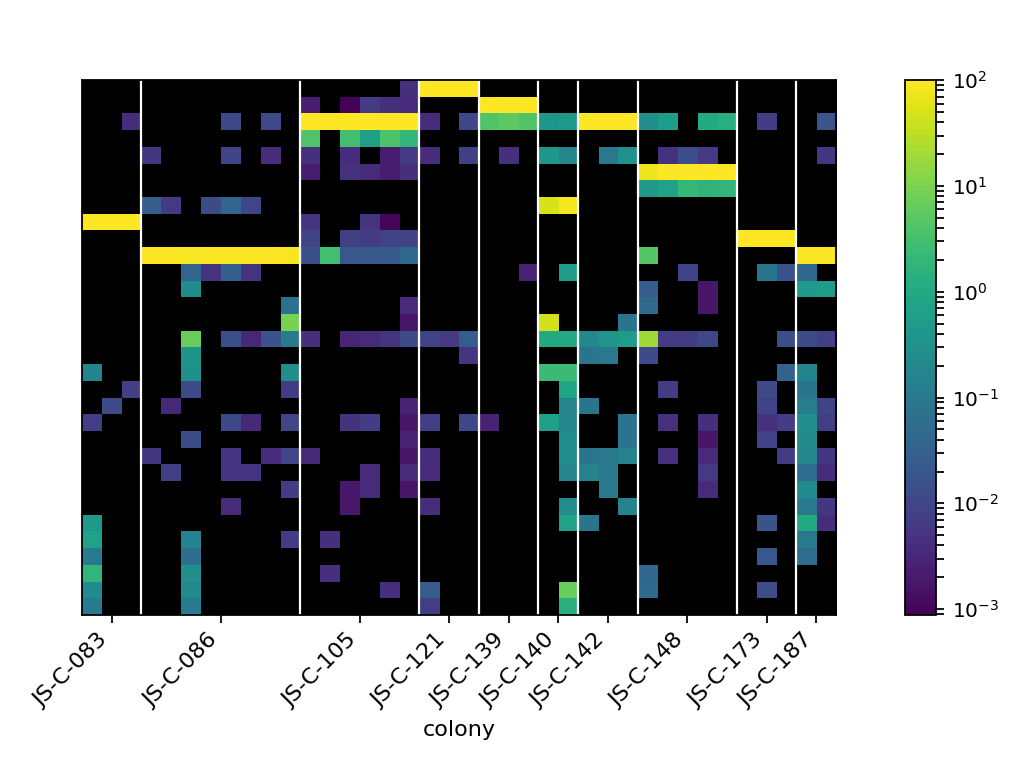

In [46]:
tt=datx.filter_samples('genus','Camponotus')

tt=tt.filter_prevalence(0.1)

tt=tt.cluster_features(10)

f=tt.normalize(100).sort_samples('colony').plot(sample_field='colony',gui='jupyter',
                                                clim=[0,100], feature_field=None)

In [47]:
f.save_figure('figure-4D-ants-colony-camponotus.pdf')

## Dolichonderus (fig 4E)

2017-10-16 23:06:53 INFO After filtering, 129 remaining
2017-10-16 23:06:53 INFO After filtering, 121 remaining


<IPython.core.display.Javascript object>


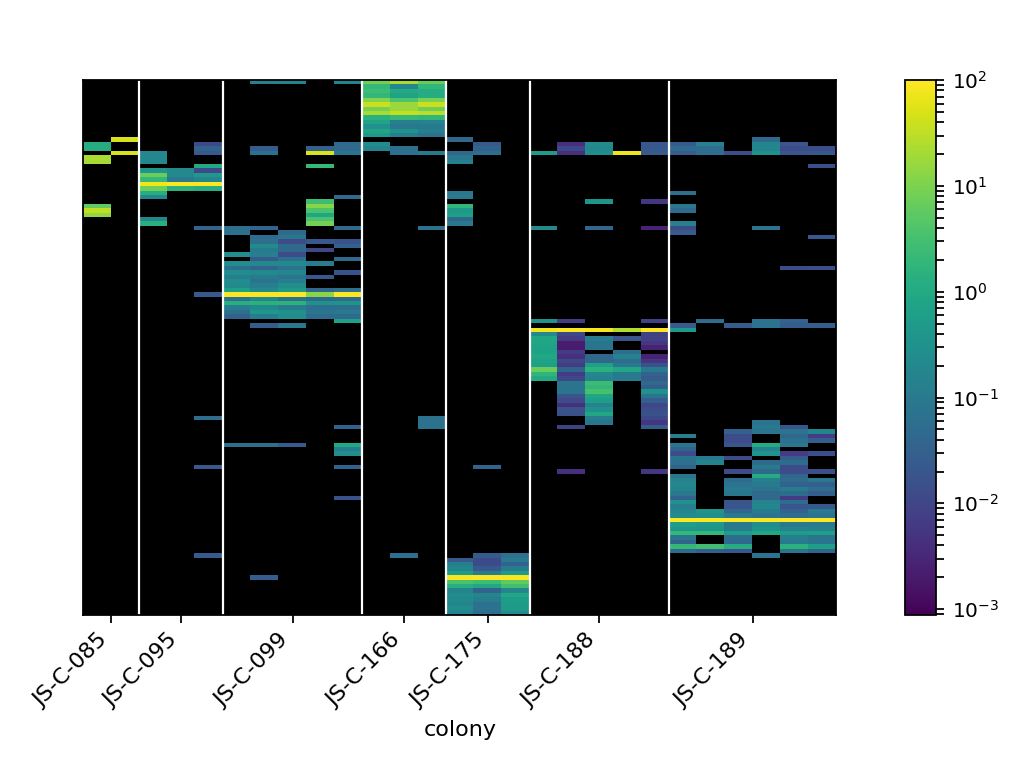

In [49]:
tt=datx.filter_samples('genus','Dolichoderus')

tt=tt.filter_prevalence(0.1)

tt=tt.cluster_features(10)

f=tt.normalize(100).sort_samples('colony').plot(sample_field='colony',gui='jupyter',
                                                clim=[0,100], feature_field=None)

In [50]:
f.save_figure('figure-4E-ants-colony-dolychonderus.pdf')

## Cephalotes

2017-10-16 23:07:40 INFO After filtering, 133 remaining
2017-10-16 23:07:40 INFO After filtering, 112 remaining


<IPython.core.display.Javascript object>


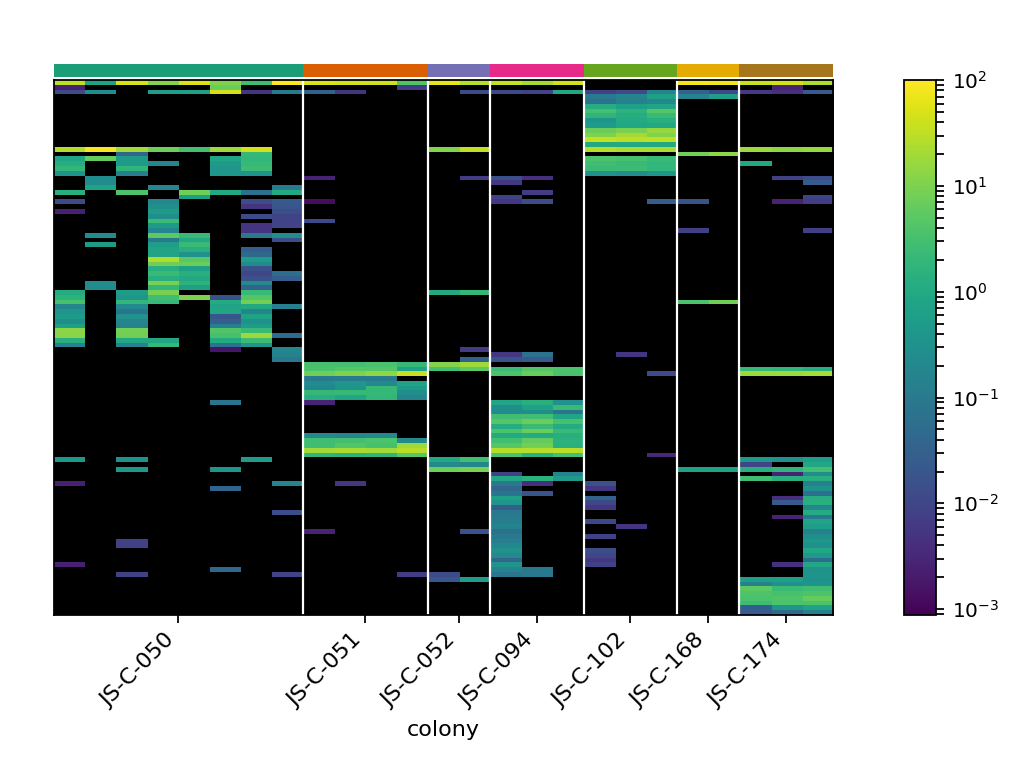

In [51]:
tt=datx.filter_samples('genus','Cephalotes')

tt=tt.filter_prevalence(0.1)

tt=tt.cluster_features(10)

f=tt.normalize(100).sort_samples('colony').plot(sample_field='colony',gui='jupyter',
                                                barx_fields=['colony'],barx_label=False,clim=[0,100])

## Neoponera

2017-10-16 23:08:12 INFO After filtering, 389 remaining
2017-10-16 23:08:12 INFO After filtering, 362 remaining


<IPython.core.display.Javascript object>


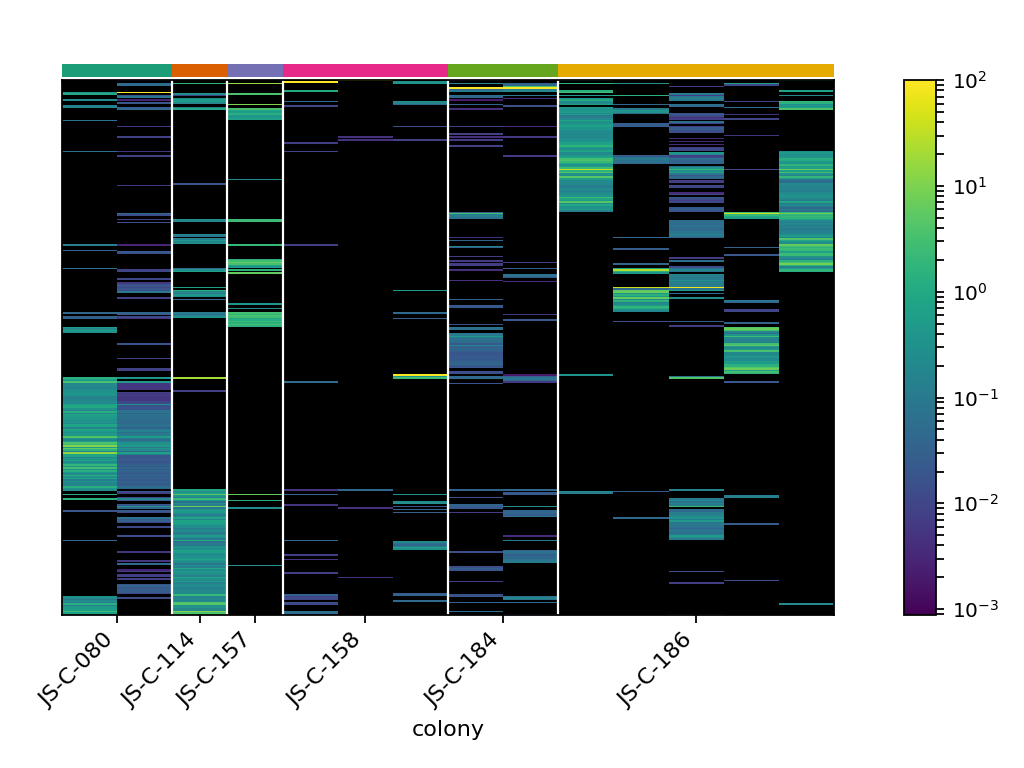

In [52]:
tt=datx.filter_samples('genus','Neoponera')

tt=tt.filter_prevalence(0.1)

tt=tt.cluster_features(10)

f=tt.normalize(100).sort_samples('colony').plot(sample_field='colony',gui='jupyter',
                                                barx_fields=['colony'],barx_label=False,clim=[0,100])